<img src = "logos.png" width = 600, align = "center">
<br>
<h1 align=center>Tout le monde veut aller au Canada</h1>

Ce notebook explore un jeu de données sur l'immigration au Canada. Les statistiques sont fournies par l'ONU et contiennent des données annuelles sur les flux de migrants enregistrées par les pays de destination.[Lien](https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp#)

### Pre-process

Importer les librairies et charger le jeu de données dans un dataFrame. Ne charger que la feuille de calcul :"Canada by Citizenship" en supprimant les lignes inutiles en début et en fin de feuille.

In [77]:
import pandas as pd
import seaborn as sns
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Afficher les 5 premières lignes.

In [78]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


Supprimer les colonnes 'AREA', 'REG', 'DEV', 'Type', 'Coverage' et 'DevName' ne seront pas utiles dans ce notebook.<br>
Pour plus d'informations sur le jeu de données : [Source](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml)
Renommer ensuite les colonnes 'OdName'=>'Pays' , 'AreaName'=>'Continent' et 'RegName'=>'Region'

In [79]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage', 'DevName'], axis=1, inplace=True)
df_can = df_can.rename(columns={'OdName':'Pays', 'AreaName':'Continent', 'RegName':'Region'})
df_can.head()

,Pays,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


**Indexez le dataFrame par la colonne 'Pays'**

In [90]:
df_can.set_index('Pays', inplace=True)
df_can['total']=df_can.iloc[:,2:].sum(axis=1)
df_can.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Pays,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
Marshall Islands,Oceania,Micronesia,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,4
Western Sahara,Africa,Northern Africa,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
San Marino,Europe,Southern Europe,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,10
New Caledonia,Oceania,Melanesia,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,10


Ajoutez une colonne 'Total' affichant le total d'immigrants par pays.

### Visualisations

Paramétrage

In [5]:
# Affichage des graphiques dans le navigateur
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

**1. Line Plot (Courbe)**

Qu'est-ce qu'un *Line Plot* et quand l'utiliser?

Il s'agit ni plus ni moins que d'une série de points de données appelés «marqueurs» reliés par des segments de droite.<br>Ce type de graphique est très adapté aux données continues et c'est aussi le plus adapté pour repésenter les tendances sur une période donnée.

Exemple :

En 2010, Haïti a subi un séisme catastrophique de magnitude 7,0. Le séisme a provoqué des dégâts considérables et des pertes en vies humaines et environ trois millions de personnes ont été touchées par cette catastrophe naturelle. Dans le cadre des efforts humanitaires du Canada, le gouvernement du Canada a intensifié ses efforts pour accepter les réfugiés d'Haïti. Nous pouvons rapidement visualiser cet effort en utilisant un tracé linéaire:

Plusieurs étapes sont nécessaires : 
 - Extraire les données correspondantes à 'Haiti'
 - Transtyper le type associé aux valeurs de l'index en int
 - Créer un graphique de type 'line'
 - Définir le titre : 'Immigration depuis Haiti'
 - Donner un titre aux axes : x : 'Années' et y : 'Nombre d'imigrants'
 - Afficher le graphique

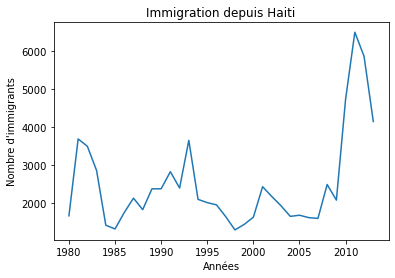

In [13]:
haiti = df_can.loc['Haiti'][2:-1]
plt.title('Immigration depuis Haiti')
plt.ylabel('Nombre d\'immigrants')
plt.xlabel('Années')

#haiti.index = haiti.index.astype('int64')
haiti.plot(kind='line')
plt.show()

Le pic correspondant à la catastrophe est bien visible sur le graphique. Il convient d'ajouter des annotations : utiliser la commande plt.text(x,y,texte) pour ajouter une information au pic.

**Question** : Comparer le nombre d'immigrant au Canada provenant d'Inde à ceux provenant de Chine de 1983 à 2013

In [14]:

df_CI= df_can.loc[['China', 'India']]
df_CI.drop(columns=['Continent', 'Region', 'total'], inplace=True)
df_CI=df_CI.iloc[:, 3:].T

Text(0.5, 0, 'Années')

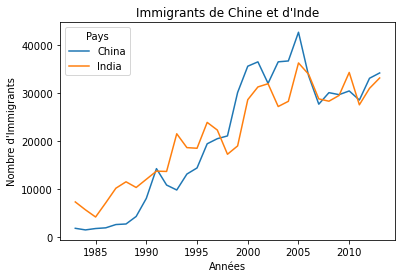

In [15]:

df_CI.plot(kind='line')
plt.title('Immigrants de Chine et d\'Inde')
plt.ylabel('Nombre d\'Immigrants')
plt.xlabel('Années')

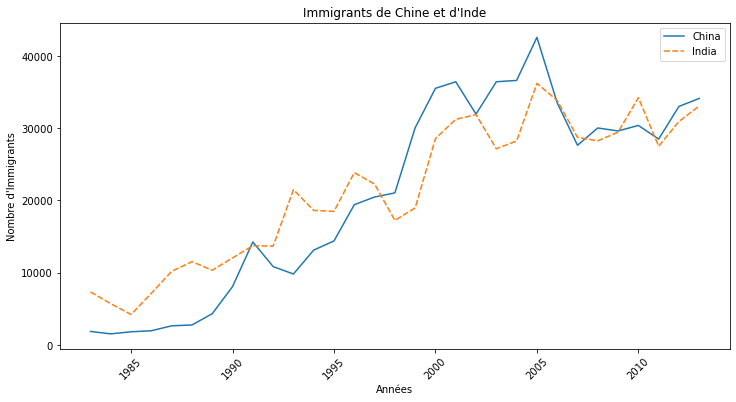

In [16]:
#avec sns
plt.figure(figsize=(12,6))
sns.lineplot(data=df_CI)
plt.title('Immigrants de Chine et d\'Inde')
plt.ylabel('Nombre d\'Immigrants')
plt.xlabel('Années')
plt.xticks(
    rotation=45 
)
plt.show()

Conclusion : 

Comparer maintenant le flux migratoire de 1983 à 2013 des cinq pays ayant eu le plus de migrants vers le Canada sur les 20 ans.

In [17]:
df_can = df_can.drop(df_can.columns[[3,4,5]], axis=1)
df_can.sort_values('total', ascending = False, axis = 0, inplace=True)
df_top5 = df_can.head()
df_top5[['Continent','Region','total']].head()

,Continent,Region,total
Pays,,,
India,Asia,Southern Asia,1391146
China,Asia,Eastern Asia,1322667
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,1105733
Philippines,Asia,South-Eastern Asia,1025539
Pakistan,Asia,Southern Asia,490538


In [18]:
df_top5=df_top5.T[2:-1]
df_top5.index=df_top5.index.astype('int64')

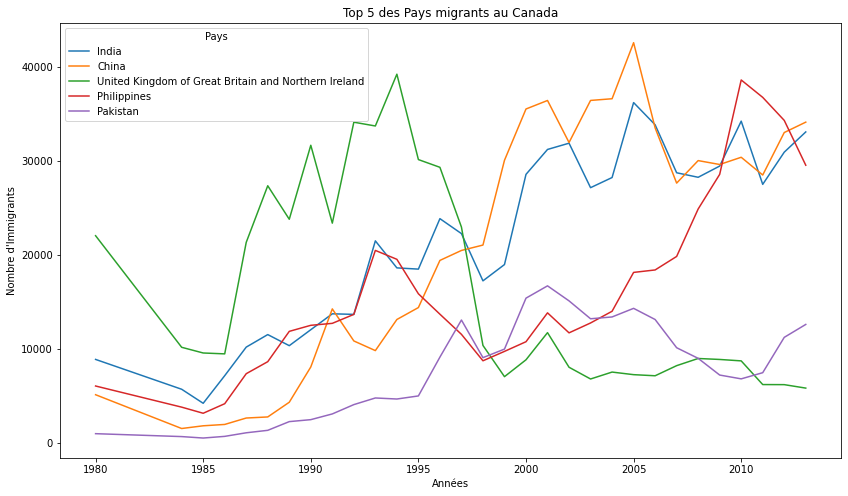

In [19]:
df_top5.plot(kind='line', figsize=(14, 8))

plt.title('Top 5 des Pays migrants au Canada')
plt.ylabel('Nombre d\'Immigrants')
plt.xlabel('Années')

plt.show()

**2. Area Plot (Graphique en aires empilées)**

Plus lisible que le dernier graphique, le graphique en aires empilées (stacked line plot ou Area plot) est préferable lorqu'on représente plusieurs séries sur la même figure.<br>
Le *Area plot* a une transparence réglée par défaut à 0,5 et le paramètre *stacked* permet de définir si les aires sont empilées ou non (True par défaut).<br>
Représenter la comparaison précédente par des aires emplilées en utilisant l'attribut kind='area'

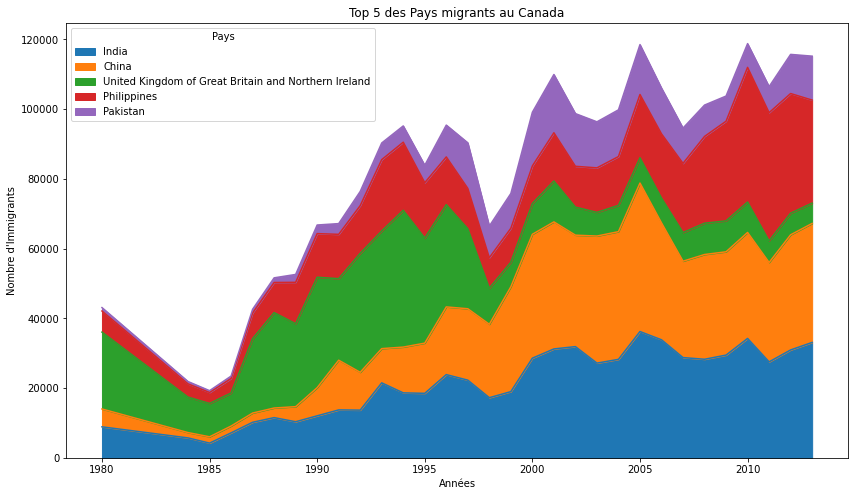

In [20]:
df_top5.plot(kind='area', figsize=(14, 8))

plt.title('Top 5 des Pays migrants au Canada')
plt.ylabel('Nombre d\'Immigrants')
plt.xlabel('Années')

plt.show()

**Question** : Représenter avec une transparence de 0.45 les 5 pays ayant le moins migrants au Canada sur la période 1980 - 2013

,Continent,Region,1980,1984,1985,1986,1987,1988,1989,1990,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Pays,,,,,,,,,,,,,,,,,,,,,
Canada,Northern America,Northern America,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,1,1,2,2751
New Caledonia,Oceania,Melanesia,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,2749
San Marino,Europe,Southern Europe,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2744
Sao Tome and Principe,Africa,Middle Africa,0,0,0,0,0,0,0,0,...,1,1,0,0,1,2,0,0,1,2736
Western Sahara,Africa,Northern Africa,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2721


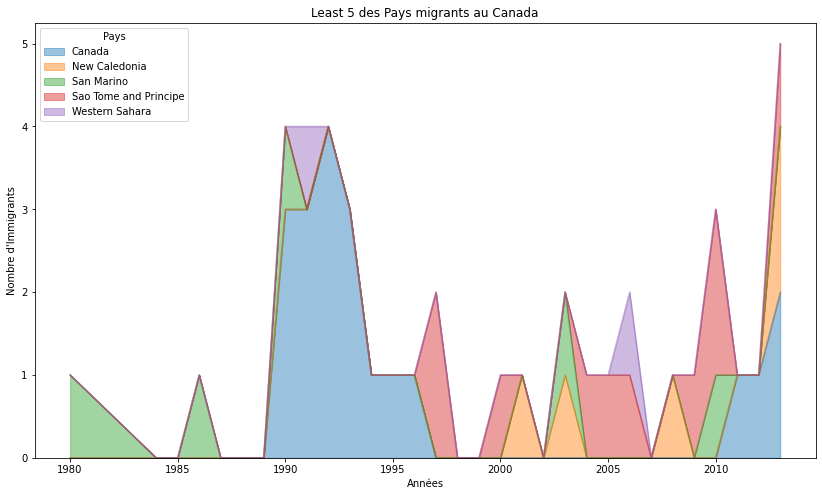

In [30]:
df_can.sort_values('total', ascending = False, axis = 0, inplace=True)
df_least5 = df_can.tail(5)
display(df_least5)
df_least5=df_least5.T[2:-1]
df_least5.plot(kind='area', figsize=(14, 8), alpha=0.45)

plt.title('Least 5 des Pays migrants au Canada')
plt.ylabel('Nombre d\'Immigrants')
plt.xlabel('Années')

plt.show()

**3. Les histogrammes**

Un histogramme est un moyen de représenter la distribution de fréquence d'un jeu de données numériques.<br>
Fonctionement : l’axe des x est découpé en intervalles, puis on compte le nombre de points de données attribués à chaque intervalle.<br>
L'axe des ordonnées est donc la fréquence ou le nombre de points de données dans chaque groupe.<br>
Le nombre d'intervalles **bins** (10 par défaut) est paramétrable et permet d'affiner la représentation.

Quelle est la distribution de fréquence du nombre de nouveaux immigrants de divers pays au Canada en 2013 ?

In [32]:
df_can[2013].head()

Pays
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

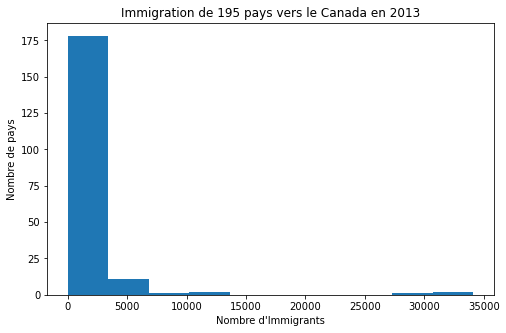

In [33]:
df_can[2013].plot(kind='hist', figsize=(8, 5))

plt.title('Immigration de 195 pays vers le Canada en 2013')
plt.ylabel('Nombre de pays') 
plt.xlabel('Nombre d\'Immigrants')

plt.show()

La plupart du temps les graduations ne sont pas alignées avec le découpage des intervalles, mais il est possible d'améliorer le graphique en récupérant le découpage en intervalles avec la fonction histogram de numy et en définissant le paramètre xticks

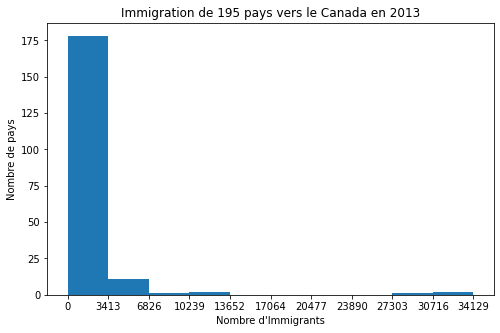

In [35]:
import numpy as np
nb, bornes_sup = np.histogram(df_can[2013])
df_can[2013].plot(kind='hist', figsize=(8, 5), xticks=bornes_sup)

plt.title('Immigration de 195 pays vers le Canada en 2013')
plt.ylabel('Nombre de pays') 
plt.xlabel('Nombre d\'Immigrants')

plt.show()

**Exercice**
Créer un histogramme représentant les flux migratoires vers le Canada depuis le Danemark, la norvège et la Suéde

In [53]:

#Visualisation des premières lignes des données
df_Eur_Nord = df_can.loc[['Denmark', 'Norway', 'Sweden']]
df_Eur_Nord

,Continent,Region,1980,1984,1985,1986,1987,1988,1989,1990,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Pays,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,272,93,73,93,109,129,129,118,...,62,101,97,108,81,92,93,94,81,10535
Norway,Europe,Northern Europe,116,31,54,56,80,73,76,83,...,57,53,73,66,75,46,49,53,59,7387
Sweden,Europe,Northern Europe,281,128,158,187,198,171,182,130,...,205,139,193,165,167,159,134,140,140,14465


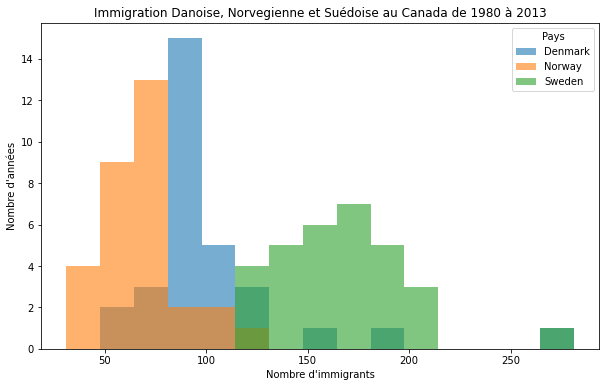

In [58]:
# Création de l'histogramme taille(10,6) , transparence alpha = 0.6 , découper en 15 intervalles
df_Eur_Nord_t = df_Eur_Nord.transpose()[2:-1]
nb, bornes_sup = np.histogram(df_Eur_Nord_t, bins=15)
df_Eur_Nord_t.plot(kind ='hist', figsize=(10, 6),
                      bins=15,alpha=0.6)

plt.title('Immigration Danoise, Norvegienne et Suédoise au Canada de 1980 à 2013')
plt.ylabel('Nombre d\'années')
plt.xlabel('Nombre d\'immigrants')

plt.show()

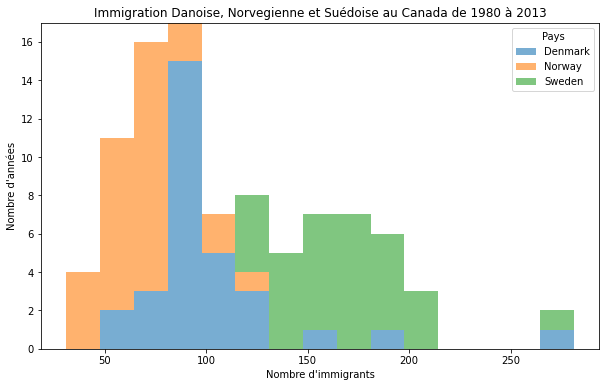

In [59]:
# Refaire le graphique en ajoutant un paramètre stacked =True
# Création de l'histogramme taille(10,6) , transparence alpha = 0.6 , découper en 15 intervalles
df_Eur_Nord_t = df_Eur_Nord.transpose()[2:-1]
nb, bornes_sup = np.histogram(df_Eur_Nord_t, bins=15)
df_Eur_Nord_t.plot(kind ='hist', figsize=(10, 6),
                      bins=15,alpha=0.6, stacked=True)

plt.title('Immigration Danoise, Norvegienne et Suédoise au Canada de 1980 à 2013')
plt.ylabel('Nombre d\'années')
plt.xlabel('Nombre d\'immigrants')

plt.show()

### Diagramme à batons (Bar Charts)
La longueur de chaque baton (barre) est proportionnelle à l'effectif/la mesure associée à une caractéristique.

Deux types de diagrammes sont possibles :

- kind=bar  : graphique vertical
- kind=barh  : graphique horizontal

1. Diagramme à batons vertical

L'axe des x représente les caracrtéistiques. Ce type de diagramme est très utile pour représenter des séries temporelles mais son principal inconvénient est le manque de place pour ajouter du texte en dessous de chaque baton.

Exemple : 

In [63]:
# Récupération des données
df_iceland = df_can.loc['Iceland'][2:-1]
df_iceland.head()

1980    17
1984    13
1985     6
1986    11
1987    11
Name: Iceland, dtype: object

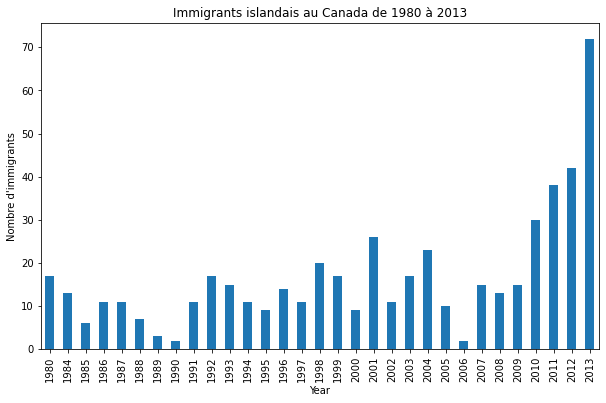

In [64]:
# Graphique
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # axe des abscisses
plt.ylabel('Nombre d\'immigrants') # axe des ordonnées
plt.title('Immigrants islandais au Canada de 1980 à 2013') # titre du graphique

plt.show()

L'islande a connu une grave crise financière de 2008 et les effets sont clairement visibles sur le graphique. On voit, en effet, une nette augmentation du nombre d'immigrants islandais après 2008.

L'idée, ici, est d'ajouter une flèche entre la barre 2008 et celle de 2013.

En utilisant la méthode `annotate` et les paramètres suivants :
- `s`: str, texte de l'annotation.
- `xy`: Tuple :  coordonnées de la pointe de la flèche.
- `xytext`: Tuple : coordonnées du point de départ du texte (départ de la flèche).

- `arrowprops`: Dictionnaire de définition de la flèche:
    - `arrowstyle`: Style de la flèche, `'->'` : pointe standard.
    - `connectionstyle`: Type de trait. 
    - `arc3` est une ligne droite.
    - `color`: Couleur de la flèche.
    - `lw`: Epaisseur du trait.

Plus d'infos sur : 
- http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.
- https://matplotlib.org/3.1.1/gallery/userdemo/connectionstyle_demo.html

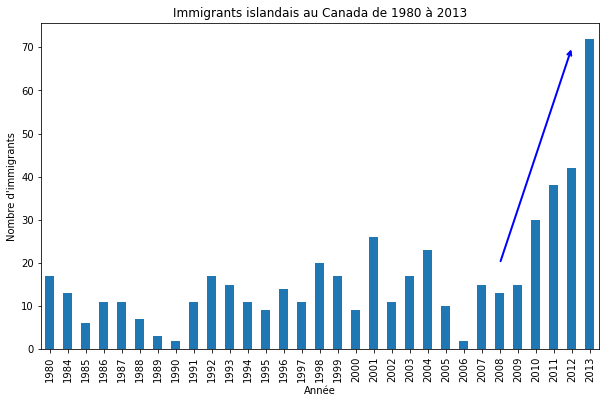

In [74]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Année')
plt.ylabel('Nombre d\'immigrants')
plt.title('Immigrants islandais au Canada de 1980 à 2013')

# Flèche
plt.annotate('',                      # pas de texte
             xy=(29, 70),             # année 2012 , population 70
             xytext=(25, 20),         # année 2008 , population 20 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Ajouter un texte le long de la flèche : Crise financière de 2008 - 2011.
Paramètres à utiliser : 

rotation: Rotation du texte (sens direct)
va: alignement vertical [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
ha: alignement horisontal [‘center’ | ‘right’ | ‘left’]

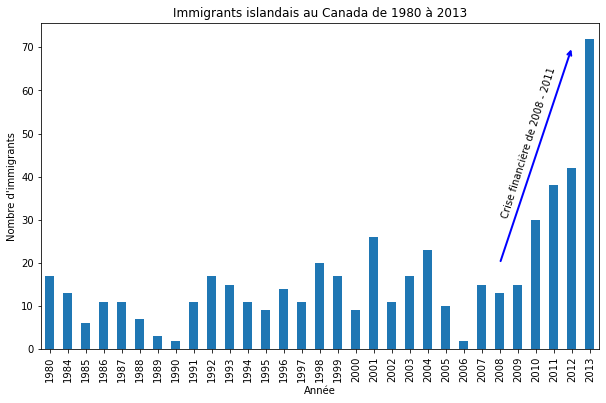

In [86]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Année')
plt.ylabel('Nombre d\'immigrants')
plt.title('Immigrants islandais au Canada de 1980 à 2013')

# Flèche
plt.annotate('',                      # pas de texte
             xy=(29, 70),             # année 2012 , population 70
             xytext=(25, 20),         # année 2008 , population 20 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotation de la flèche 
plt.annotate('Crise financière de 2008 - 2011', # texte
             xy=(25, 30),                    # début du texte 2008 , 30
             rotation=72.5,                  # plusieurs essais sont nécessaires
             
             va='bottom',
             ha='left',
            )

plt.show()

**Diagramme à batôns horizontal**

Lorsque les étiquettes de l'axe des abscisses sont des textes nécessitant plus de place, il est plus confortable d'utiliser les diagrammes horisontaux.


**Question:** 
A partir du dataFrame `df_can` dataset, créer un diagramme à bâtons *horizontal* représentant les 15 pays ayant eu le plus grand nombre *total* d'immigrants au Canada, de 1980 à 2013.<br>Faire apparaître le nombre d'immigrants sur les barres.<br>
*Indication* : Faire une boucle sur les pays et utiliser la méthode annotate

In [92]:
# Tri des données par la colonne 'Total'
df_can.sort_values(by='total', ascending=True, inplace=True)

# récupération du top 15
df_top15 = df_can['total'].tail(15)
df_top15

Pays
Romania                                                  187170
Viet Nam                                                 194292
Jamaica                                                  212862
France                                                   218182
Lebanon                                                  230718
Poland                                                   278482
Republic of Korea                                        285162
Sri Lanka                                                296716
Iran (Islamic Republic of)                               351846
United States of America                                 482244
Pakistan                                                 483200
Philippines                                             1022782
United Kingdom of Great Britain and Northern Ireland    1103000
China                                                   1319924
India                                                   1383808
Name: total, dtype: int64

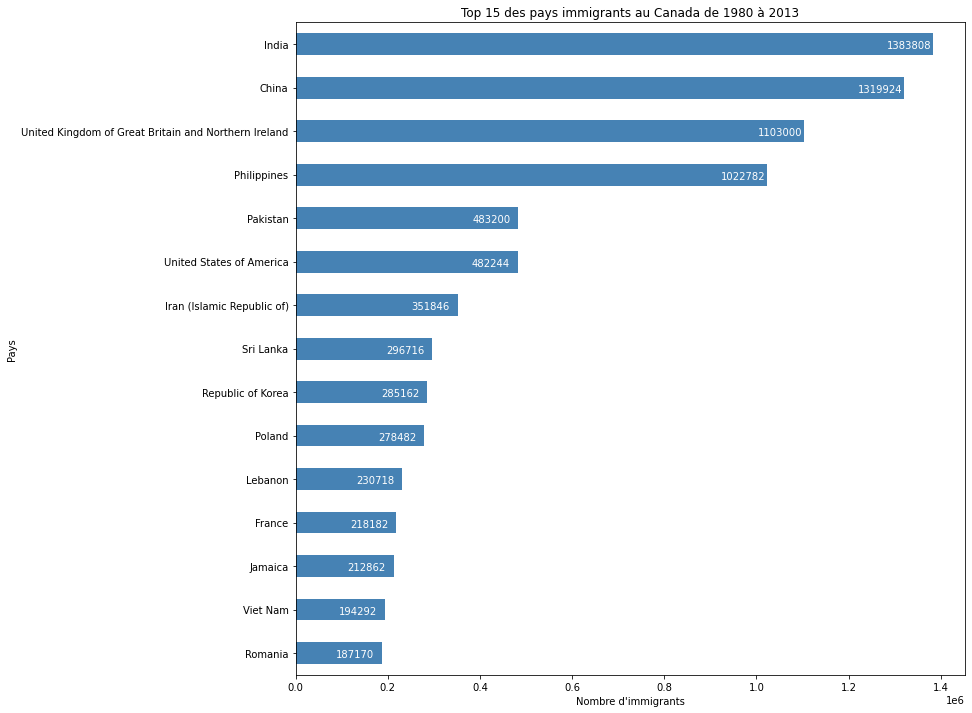

In [96]:
# Création des graphiques
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Nombre d\'immigrants')
plt.title('Top 15 des pays immigrants au Canada de 1980 à 2013')

# annotate value labels to each countryAnnotation
for index, val in enumerate(df_top15): 
    label = val # ou bien format(int(val), ',') pour faire apparaitre le séparateur de milliers
    
    # Texte en fin de barre (soustraire 100000 à x, et 0.1 à y pour l'adapter au graphique)
    plt.annotate(label, xy=(val-100000, index - 0.10), color='white')

    
plt.show()

<hr>
Copyright &copy; 2020 Hatem & Driss @NEEDEMAND